In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections.abc import Iterable

In [2]:
with open(r'files/refTopicDict.pkl', 'rb') as f2:
    refDict = pickle.load(f2)

In [3]:
df = pd.read_csv('files/topics_refs.txt', delimiter= '\t')

In [4]:
df['refTopics'] = [ eval(x) for x in df['refTopics'] ]

In [6]:
df = df.groupby('title')['refTopics'].apply(list).reset_index(name='refTopics')

In [8]:
def flatten(l):
    for el in l:
        if isinstance(el, Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el

In [9]:
df['refTopics'] =  df['refTopics'].apply(lambda x:list(flatten(x)))

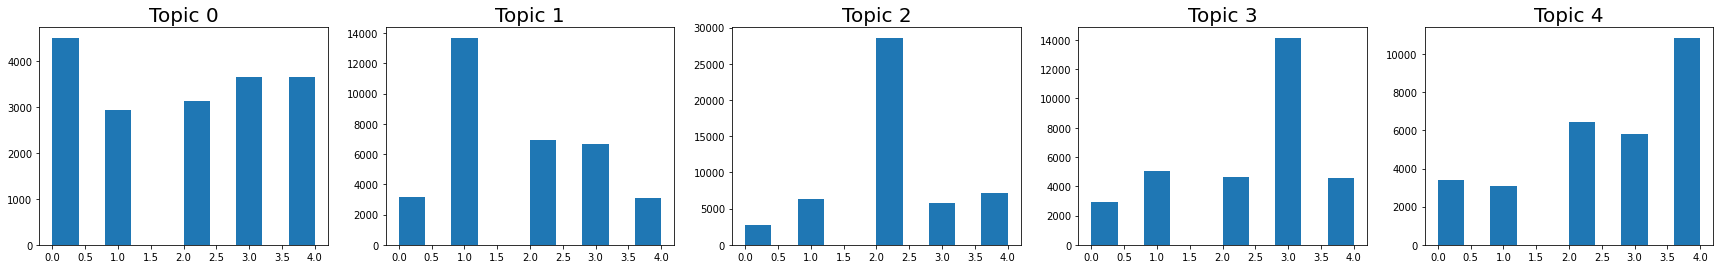

In [10]:
rows = ((len(df)-2) // 5) + 1
fig, axes = plt.subplots(rows, 5, figsize=(30, (4*rows)), sharex=True) # 1x5 plot
axes = axes.flatten()
for i in range(0, len(df)):
    ax = axes[i]
    ax.hist(df[df['title']==i]['refTopics'])
    ax.set_title(f"Topic {i}", fontdict={"fontsize": 20})

plt.show()